<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

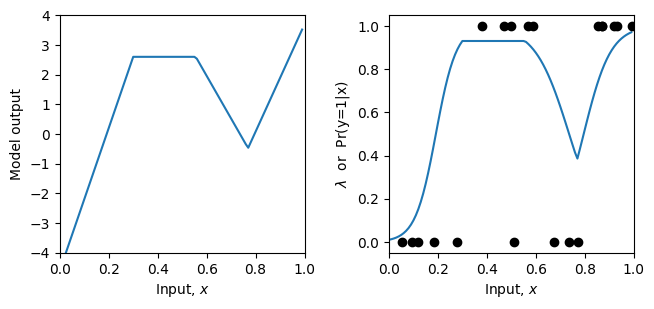

Correct answer = 0.800, Your answer = 0.800
Correct answer = 0.200, Your answer = 0.200
Correct answer = 0.000070237, Your answer = 0.000070237
Correct answer = 9.563639387, Your answer = 9.563639387


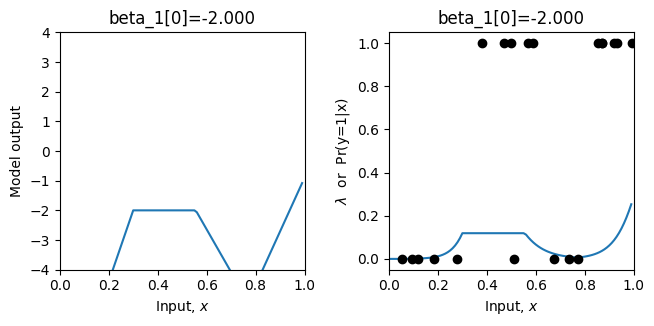

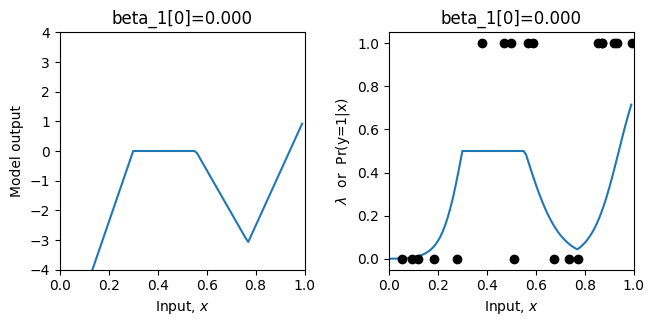

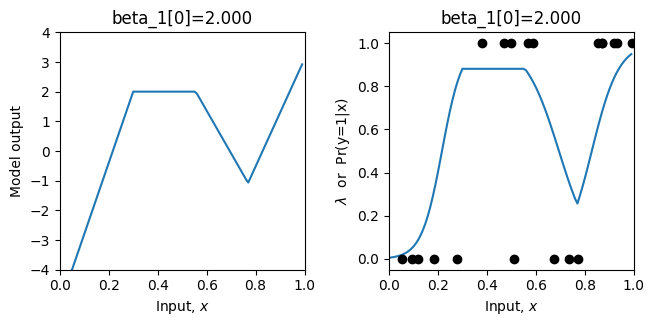

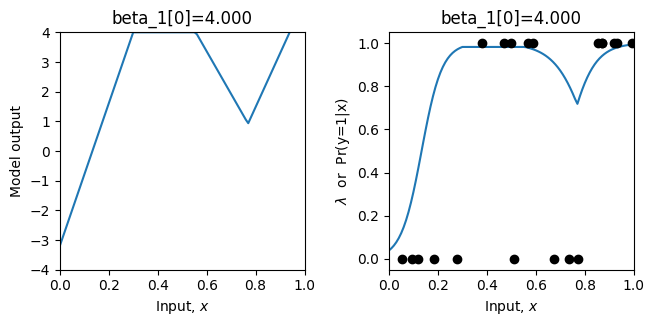

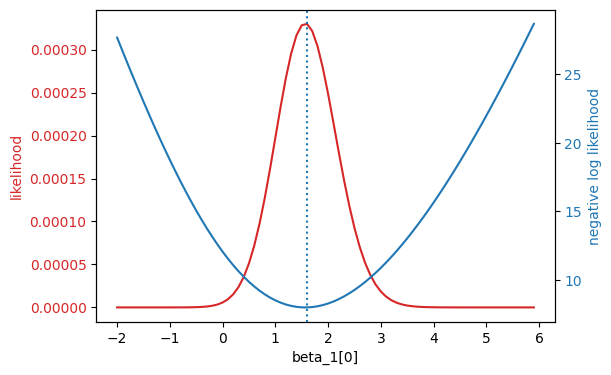

Maximum likelihood = 0.000330, at beta_1 = 1.600
Minimum negative log likelihood = 8.016513, at beta_1 = 1.600


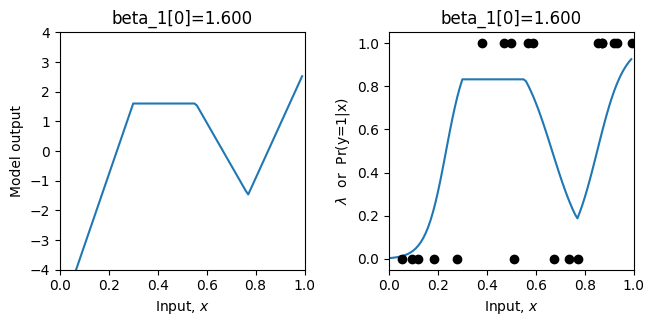

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def ReLU(preactivation):
    activation = preactivation.clip(0.0)
    return activation

def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    n_data = x.size
    x = np.reshape(x,(1,n_data))
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))
    model_out = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return model_out

def get_parameters():
    beta_0 = np.zeros((3,1))
    omega_0 = np.zeros((3,1))
    beta_1 = np.zeros((1,1))
    omega_1 = np.zeros((1,3))
    beta_0[0,0] = 0.3;  beta_0[1,0] = -1.0;  beta_0[2,0] = -0.5
    omega_0[0,0] = -1.0; omega_0[1,0] = 1.8;  omega_0[2,0] = 0.65
    beta_1[0,0]  = 2.6
    omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0
    return beta_0, omega_0, beta_1, omega_1

def plot_binary_classification(x_model, out_model, lambda_model,
                               x_data=None, y_data=None, title=None):
    x_model = np.squeeze(x_model)
    out_model = np.squeeze(out_model)
    lambda_model = np.squeeze(lambda_model)
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(7.0, 3.5)
    fig.tight_layout(pad=3.0)
    ax[0].plot(x_model, out_model)
    ax[0].set_xlabel(r'Input, $x$')
    ax[0].set_ylabel(r'Model output')
    ax[0].set_xlim([0,1]); ax[0].set_ylim([-4,4])
    if title: ax[0].set_title(title)
    ax[1].plot(x_model, lambda_model)
    ax[1].set_xlabel(r'Input, $x$')
    ax[1].set_ylabel(r'$\lambda$  or  Pr(y=1|x)')
    ax[1].set_xlim([0,1]); ax[1].set_ylim([-0.05,1.05])
    if title: ax[1].set_title(title)
    if x_data is not None:
        ax[1].plot(x_data, y_data, 'ko')
    plt.show()

def sigmoid(model_out):
    sig_model_out = 1.0 / (1.0 + np.exp(-model_out))
    return sig_model_out

x_train = np.array([
 0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,
 0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,
 0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,
 0.87168699,0.58858043])

y_train = np.array([
 0,1,1,0,0,1,
 1,0,0,1,0,1,
 0,1,1,0,1,0,
 1,1])

beta_0, omega_0, beta_1, omega_1 = get_parameters()
x_model = np.arange(0,1,0.01)
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model, x_train, y_train)

def bernoulli_distribution(y, lambda_param):
    prob = np.power(lambda_param, y) * np.power((1.0 - lambda_param), (1.0 - y))
    return prob

print("Correct answer = %3.3f, Your answer = %3.3f" % (0.8, bernoulli_distribution(0,0.2)))
print("Correct answer = %3.3f, Your answer = %3.3f" % (0.2, bernoulli_distribution(1,0.2)))

def compute_likelihood(y_train, lambda_param):
    likelihood = np.prod(bernoulli_distribution(y_train, lambda_param))
    return likelihood

beta_0, omega_0, beta_1, omega_1 = get_parameters()
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = sigmoid(model_out)
likelihood = compute_likelihood(y_train, lambda_train)
print("Correct answer = %9.9f, Your answer = %9.9f" % (0.000070237, likelihood))

def compute_negative_log_likelihood(y_train, lambda_param):
    nll = -np.sum(np.log(bernoulli_distribution(y_train, lambda_param)))
    return nll

nll = compute_negative_log_likelihood(y_train, lambda_train)
print("Correct answer = %9.9f, Your answer = %9.9f" % (9.563639387, nll))

beta_1_vals = np.arange(-2,6.0,0.1)
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)

beta_0, omega_0, beta_1, omega_1 = get_parameters()
for count in range(len(beta_1_vals)):
    beta_1[0,0] = beta_1_vals[count]
    model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
    lambda_train = sigmoid(model_out)
    likelihoods[count] = compute_likelihood(y_train, lambda_train)
    nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)
    if count % 20 == 0:
        model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
        lambda_model = sigmoid(model_out)
        plot_binary_classification(x_model, model_out, lambda_model,
                                   x_train, y_train,
                                   title=f"beta_1[0]={beta_1[0,0]:.3f}")

fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax.set_xlabel('beta_1[0]')
ax.set_ylabel('likelihood', color=likelihood_color)
ax.plot(beta_1_vals, likelihoods, color=likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax2 = ax.twinx()
ax2.set_ylabel('negative log likelihood', color=nll_color)
ax2.plot(beta_1_vals, nlls, color=nll_color)
ax2.tick_params(axis='y', labelcolor=nll_color)

plt.axvline(x=beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')
plt.show()

print("Maximum likelihood = %f, at beta_1 = %3.3f" %
      (likelihoods[np.argmax(likelihoods)], beta_1_vals[np.argmax(likelihoods)]))
print("Minimum negative log likelihood = %f, at beta_1 = %3.3f" %
      (nlls[np.argmin(nlls)], beta_1_vals[np.argmin(nlls)]))

beta_1[0,0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = sigmoid(model_out)
plot_binary_classification(x_model, model_out, lambda_model,
                           x_train, y_train,
                           title=f"beta_1[0]={beta_1[0,0]:.3f}")
